In [1]:
import boto3
import json

# Interesante RL en keras
https://github.com/rlcode/reinforcement-learning

In [2]:
import pandas as pd
import datetime
import numpy as np
from matplotlib import pyplot as plt
import os

In [3]:
client = boto3.client('logs')

In [4]:
logGroupName='/aws/sagemaker/TrainingJobs'
# logStreamName='dr-sm-rltj--20191002101606-325b7ca3-edd8-4654-b15d-97d47a2b8a21/algo-1-1570011477'
# No-progress-reward
logStreamName='dr-sm-rltj--20191010142353-88a5da2b-9f85-40ef-8947-3348b158ba79/algo-1-1570717564'
file_name = logStreamName.split('/')[0]

In [5]:
filename_full_path = f'TrainingLogs/{file_name}.json'
if os.path.isfile(filename_full_path):
    logs = json.load(open(filename_full_path))
else:
    logs = client.filter_log_events(logGroupName=logGroupName, 
                             logStreamNames=[logStreamName], 
                             limit=10000)
    file = open(filename_full_path, 'w')
    json.dump(logs, file)
    file.close()

In [6]:
logs.keys()

dict_keys(['events', 'searchedLogStreams', 'ResponseMetadata'])

In [7]:
df = pd.DataFrame(logs['events'])[['message', 'timestamp']]

In [20]:
if 'sagemaker' in None:
    print('d')

In [23]:
df[df.message.apply(lambda x: ('Loaded action space from file: ' in x))]

,message,timestamp
27,"Loaded action space from file: [{'index': 0, '...",1570717602882


In [8]:
# df = pd.read_csv('logs-insights-results.csv')[::-1]
# dt = datetime.datetime.strptime('2019-10-02 14:20:28.826', '%Y-%m-%d %H:%M:%S.%f')
# df['timestamp'] = df['@timestamp'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp())

In [9]:
df.head()

,message,timestamp
0,"2019-10-10 14:26:33,576 sagemaker-containers I...",1570717595878
1,"2019-10-10 14:26:33,577 sagemaker_bootstrap IN...",1570717595878
2,"2019-10-10 14:26:33,578 sagemaker_bootstrap IN...",1570717595878
3,"2019-10-10 14:26:33,578 sagemaker_bootstrap IN...",1570717595878
4,Starting sage-train.sh,1570717595878


In [10]:
df['type'] = df['message'].apply(lambda x: x.split('>')[0])

In [11]:
actions = ['Policy training', 'Checkpoint', 'Training']

In [12]:
pd.set_option('display.max_colwidth', 120)
df.iloc[30:70][['message']]

,message
30,Checkpoint> Saving in path=['./checkpoint/0_Step-0.ckpt']
31,Uploaded 3 files for checkpoint 0
32,INFO:tensorflow:Froze 11 variables.
33,INFO:tensorflow:Converted 11 variables to const ops.
34,saved intermediate frozen graph: DeepRacer-SageMaker-RoboMaker-comm-940645781828-20191010142353-f654b91c-2779-43ad-9...
35,"DoorMan: installing SIGINT, SIGTERM"
36,"Training> Name=main_level/agent, Worker=0, Episode=1, Total reward=15.89, Steps=29, Training iteration=0"
37,"Training> Name=main_level/agent, Worker=0, Episode=2, Total reward=19.82, Steps=65, Training iteration=0"
38,"Training> Name=main_level/agent, Worker=0, Episode=3, Total reward=16.98, Steps=96, Training iteration=0"
39,"Training> Name=main_level/agent, Worker=0, Episode=4, Total reward=8.83, Steps=117, Training iteration=0"


In [13]:
Num_epochs = 10 # Number of training epochs
Num_exp_episodes = 20 #Number of experience episodes between each policy-updating iteration

for j in range(2):
    print(df[df['type'] == 'Checkpoint'].iloc[j]['message'], 'Guarda Red Neuronal en HDF5')
    print('_____________________________________________________________________________________________________________________________')
    print()
    for i in range(20):
        print(df[df['type'] == 'Training'].iloc[i + Num_exp_episodes*j]['message'])
    print('_____________________________________________________________________________________________________________________________')
    print()
    for i in range(10):
        print(df[df['type'] == 'Policy training'].iloc[i + Num_epochs*j]['message'])

    print('_____________________________________________________________________________________________________________________________')
    print()

print(df[df['type'] == 'Checkpoint'].iloc[1]['message'], 'Guarda red neronal en HDF5')

Checkpoint> Saving in path=['./checkpoint/0_Step-0.ckpt'] Guarda Red Neuronal en HDF5
_____________________________________________________________________________________________________________________________

Training> Name=main_level/agent, Worker=0, Episode=1, Total reward=15.89, Steps=29, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=2, Total reward=19.82, Steps=65, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=3, Total reward=16.98, Steps=96, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=4, Total reward=8.83, Steps=117, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=5, Total reward=3.21, Steps=130, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=6, Total reward=6.22, Steps=146, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=7, Total reward=6.13, Steps=163, Training iteration=0
Training> Name=main_level/agent, Worker=0, Episode=8

In [14]:
# Cual es la ultima iteración (Cantidad de iteraciones)
# 
print(df[df['type'] == 'Training'].iloc[-1].message.split(', ')[-1])
print(df[df['type'] == 'Checkpoint'].iloc[-1].message)

Training iteration=64
Checkpoint> Saving in path=['./checkpoint/65_Step-113608.ckpt']


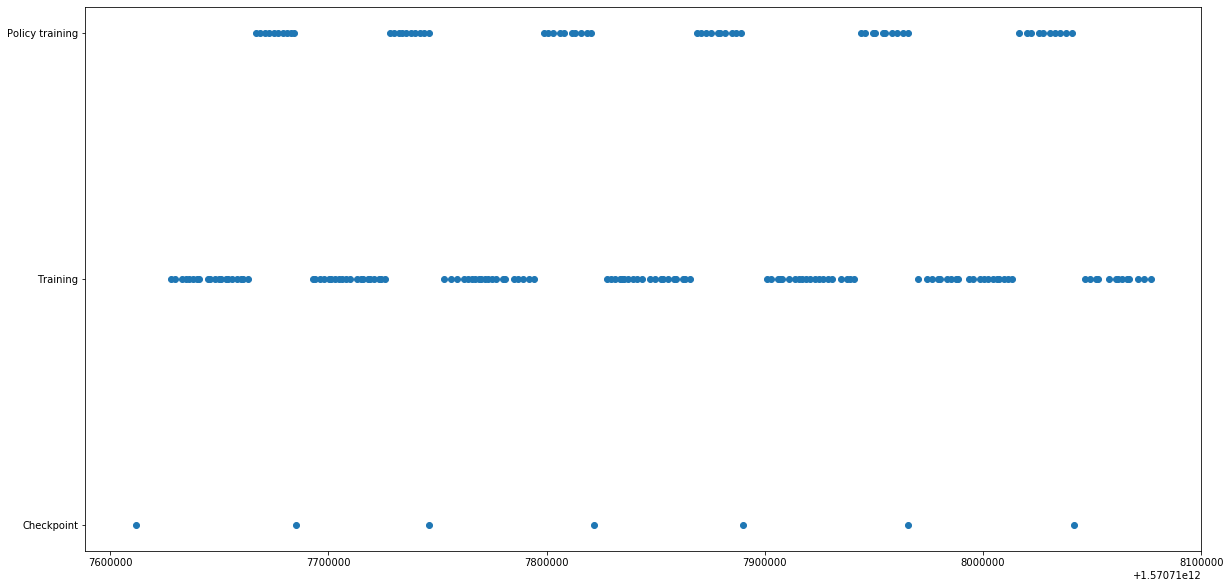

In [15]:
plt.figure(figsize=(20,10))
window = 200
plt.scatter(df[df['type'].isin(actions)]['timestamp'].values[:window], df[df['type'].isin(actions)]['type'].values[:window], marker='o')
plt.show()

# Episodes Training

In [16]:
df[df['type']=='Training'].head()

,message,timestamp,type
36,"Training> Name=main_level/agent, Worker=0, Episode=1, Total reward=15.89, Steps=29, Training iteration=0",1570717627890,Training
37,"Training> Name=main_level/agent, Worker=0, Episode=2, Total reward=19.82, Steps=65, Training iteration=0",1570717629890,Training
38,"Training> Name=main_level/agent, Worker=0, Episode=3, Total reward=16.98, Steps=96, Training iteration=0",1570717632891,Training
39,"Training> Name=main_level/agent, Worker=0, Episode=4, Total reward=8.83, Steps=117, Training iteration=0",1570717634892,Training
40,"Training> Name=main_level/agent, Worker=0, Episode=5, Total reward=3.21, Steps=130, Training iteration=0",1570717635892,Training


In [17]:
columns = [X.split('=')[0] for X in df[df['type']=='Training']['message'].iloc[0].replace('Training> ', '').replace(' ', '').split(',')][1:]
train_message_splitted = np.array(list(map(lambda x: [X.split('=')[1] for X in x.replace('Training> ', '').replace(' ', '').split(',')][1:], 
    df[df['type']=='Training']['message'].values)), dtype=float)

print(columns)

['Worker', 'Episode', 'Totalreward', 'Steps', 'Trainingiteration']


In [18]:
df[df['type']=='Training']['timestamp'].values

array([1570717627890, 1570717629890, 1570717632891, ..., 1570731875773,
       1570731889777, 1570731905787])

In [19]:
Training_df =  pd.DataFrame(data=train_message_splitted, columns=columns)
Training_df['Timestamp'] = df[df['type']=='Training']['timestamp'].values
Training_df['diff_steps'] = np.hstack([[Training_df['Steps'][0]], Training_df['Steps'][1:].values - Training_df['Steps'][:-1].values])

In [20]:
Training_df['diff_steps'].iloc[:20].mean()

20.3

In [21]:
Training_df

,Worker,Episode,Totalreward,Steps,Trainingiteration,Timestamp,diff_steps
0,0.0,1.0,15.89,29.0,0.0,1570717627890,29.0
1,0.0,2.0,19.82,65.0,0.0,1570717629890,36.0
2,0.0,3.0,16.98,96.0,0.0,1570717632891,31.0
3,0.0,4.0,8.83,117.0,0.0,1570717634892,21.0
4,0.0,5.0,3.21,130.0,0.0,1570717635892,13.0
5,0.0,6.0,6.22,146.0,0.0,1570717637893,16.0
6,0.0,7.0,6.13,163.0,0.0,1570717639894,17.0
7,0.0,8.0,4.10,177.0,0.0,1570717640894,14.0
8,0.0,9.0,16.88,214.0,0.0,1570717644895,37.0
9,0.0,10.0,6.31,227.0,0.0,1570717645896,13.0


!['No_rewards_training.png'](No_rewards_training.png)

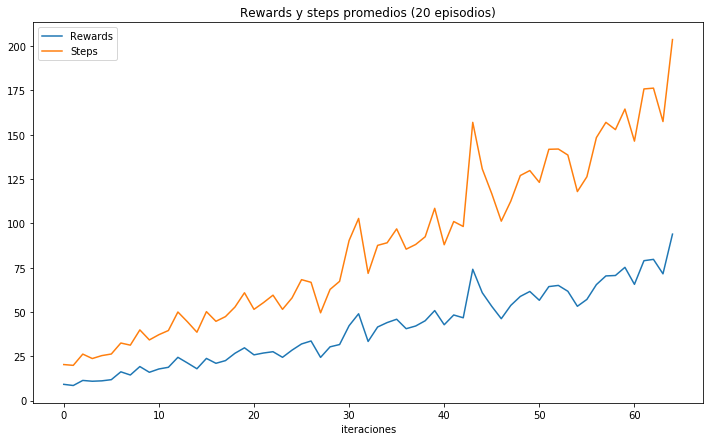

In [28]:
plt.figure(figsize=(12,7))
total_rewards_per_episode = Training_df['Totalreward'].values
steps_per_episode = Training_df['diff_steps'].values
# plt.plot(Training_df['Totalreward'].values[:500])
# plt.plot(Training_df['diff_steps'].values[:500])
plt.plot(np.mean(total_rewards_per_episode.reshape(-1, 20), axis=1), label='Rewards')
plt.plot(np.mean(steps_per_episode.reshape(-1, 20), axis=1), label='Steps')
plt.legend()
plt.xlabel('iteraciones')
plt.title('Rewards y steps promedios (20 episodios)')
plt.show()

# Policy Training

In [31]:
df[df['type']=='Policy training'].head()

,message,timestamp,type
56,"Policy training> Surrogate loss=-0.008354022167623043, KL divergence=0.0001290480577154085, Entropy=2.70662140846252...",1570717666918,Policy training
57,"Policy training> Surrogate loss=-0.01172695029526949, KL divergence=0.0006344379507936537, Entropy=2.706787824630737...",1570717668590,Policy training
58,"Policy training> Surrogate loss=0.00042569139623083174, KL divergence=0.0015401238342747092, Entropy=2.7064716815948...",1570717670733,Policy training
59,"Policy training> Surrogate loss=-0.00406131474301219, KL divergence=0.002777492394670844, Entropy=2.705639600753784,...",1570717672744,Policy training
60,"Policy training> Surrogate loss=-0.00784215796738863, KL divergence=0.004404554143548012, Entropy=2.704455614089966,...",1570717674877,Policy training


In [32]:
columns_policy = [X.split('=')[0] for X in df[df['type']=='Policy training']['message'].iloc[0].replace('Policy training> ', '').replace(' ', '').split(',')]
policy_message_splitted = np.array(list(map(lambda x: [X.split('=')[1] for X in x.replace('Policy training> ', '').replace(' ', '').split(',')], 
    df[df['type']=='Policy training']['message'].values)), dtype=float)

In [33]:
print(columns_policy)

['Surrogateloss', 'KLdivergence', 'Entropy', 'trainingepoch', 'learning_rate']


In [34]:
Policy_Training_df =  pd.DataFrame(data=policy_message_splitted, columns=columns_policy)
Policy_Training_df['Timestamp'] = df[df['type']=='Policy training']['timestamp'].values 

In [35]:
Policy_Training_df.head()

,Surrogateloss,KLdivergence,Entropy,trainingepoch,learning_rate,Timestamp
0,-0.008354,0.000129,2.706621,0.0,0.00003,1570717666918
1,-0.011727,0.000634,2.706788,1.0,0.00003,1570717668590
2,0.000426,0.001540,2.706472,2.0,0.00003,1570717670733
3,-0.004061,0.002777,2.705640,3.0,0.00003,1570717672744
4,-0.007842,0.004405,2.704456,4.0,0.00003,1570717674877


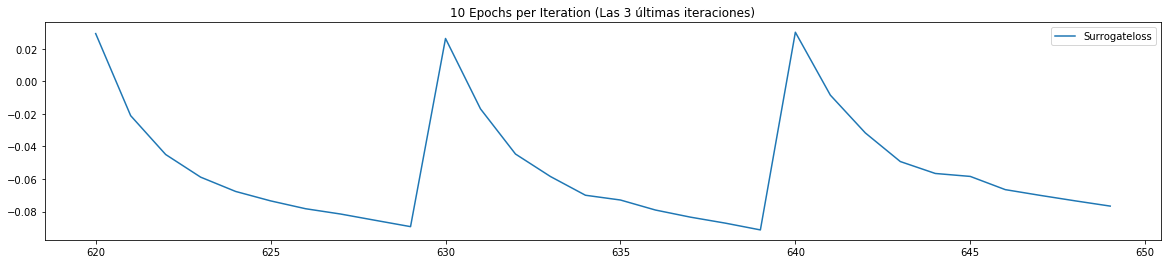

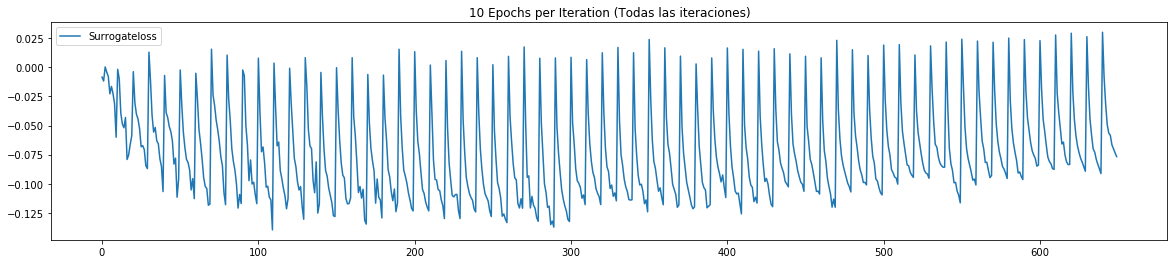

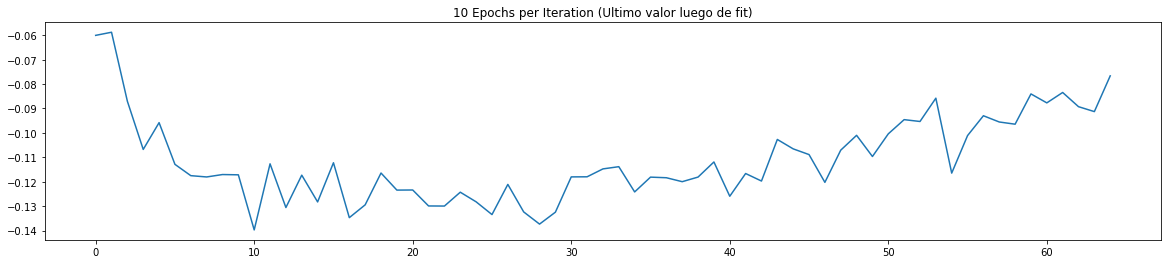

In [37]:
plt.figure(figsize=(20,4))
plt.plot(Policy_Training_df['Surrogateloss'][-30:], label='Surrogateloss')
plt.legend()
plt.title('10 Epochs per Iteration (Las 3 últimas iteraciones)')
plt.show()
plt.figure(figsize=(20,4))
plt.title('10 Epochs per Iteration (Todas las iteraciones)')
plt.plot(Policy_Training_df['Surrogateloss'], label='Surrogateloss')
plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.title('10 Epochs per Iteration (Ultimo valor luego de fit)')
plt.plot(Policy_Training_df['Surrogateloss'].values[9::10], label='Surrogateloss')
plt.show()

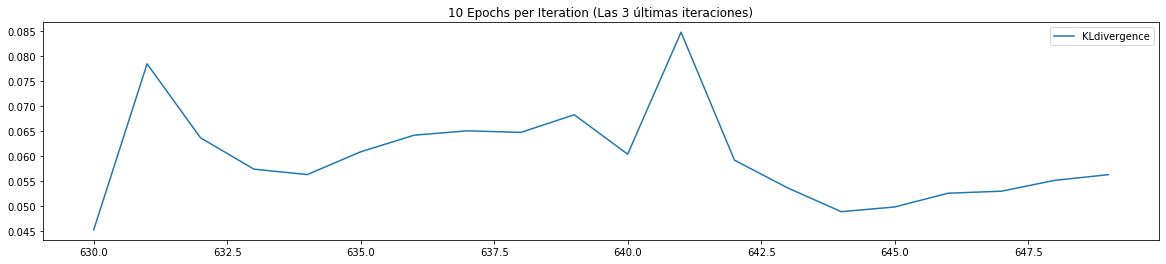

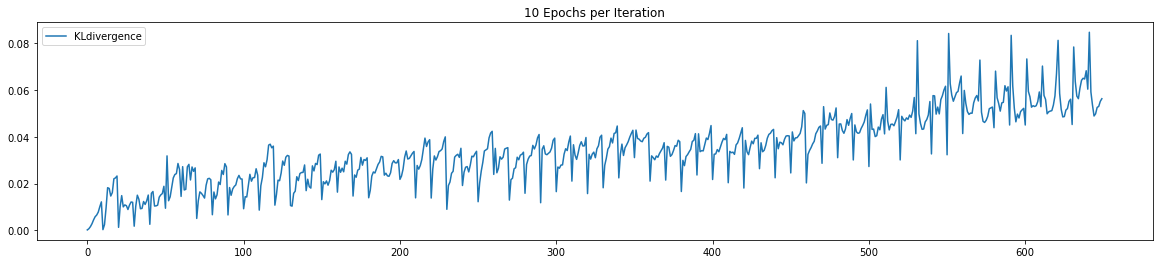

In [38]:
plt.figure(figsize=(20,4))
plt.plot(Policy_Training_df['KLdivergence'][-20:], label='KLdivergence')
plt.legend()
plt.title('10 Epochs per Iteration (Las 3 últimas iteraciones)')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(Policy_Training_df['KLdivergence'], label='KLdivergence')
plt.legend()
plt.title('10 Epochs per Iteration')
plt.show()

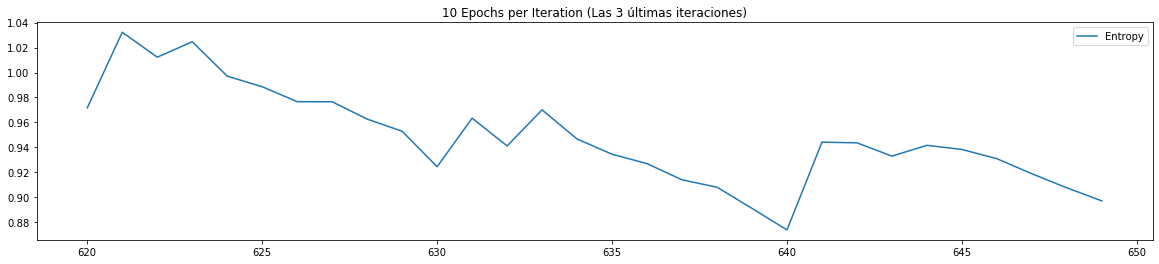

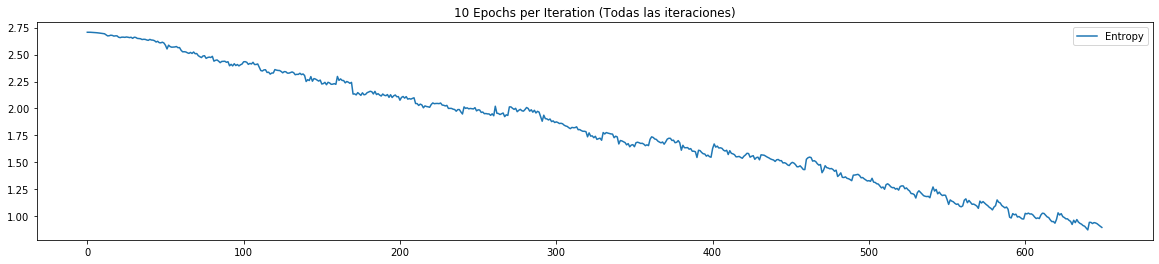

In [41]:
plt.figure(figsize=(20,4))
plt.plot(Policy_Training_df['Entropy'][-30:], label='Entropy')
plt.title('10 Epochs per Iteration (Las 3 últimas iteraciones)')
plt.legend()
plt.show()
plt.figure(figsize=(20,4))
plt.plot(Policy_Training_df['Entropy'], label='Entropy')
plt.title('10 Epochs per Iteration (Todas las iteraciones)')
plt.legend()
plt.show()

In [2]:
import math
def reward_function(params):
    track_width = params['track_width']
    distance_from_center = params['distance_from_center'] # distance in meters from the track center 
    steering = abs(params['steering_angle'])
    direction_stearing=params['steering_angle']
    speed = params['speed']
    steps = params['steps'] # number steps completed
    progress = params['progress'] # percentage of track completed
    all_wheels_on_track = params['all_wheels_on_track'] # flag to indicate if the vehicle is on the track
    
    # Read input variables
    waypoints = params['waypoints']
    closest_waypoints = params['closest_waypoints']
    heading = params['heading'] # vehicle's yaw in degrees
    
    reward = 1.0
    
    if progress == 100:
        reward += 100
    
    # Calculate the direction of the center line based on the closest waypoints
    next_point = waypoints[closest_waypoints[1]]
    prev_point = waypoints[closest_waypoints[0]]
    # Calculate the direction in radius, arctan2(dy, dx), the result is (-pi, pi) in radians
    track_direction = math.atan2(next_point[1] - prev_point[1], next_point[0] - prev_point[0]) 
    # Convert to degree
    track_direction = math.degrees(track_direction)
    # Calculate the difference between the track direction and the heading direction of the car
    direction_diff = abs(track_direction - heading)
    # Penalize the reward if the difference is too large
    DIRECTION_THRESHOLD = 10.0
    
    malus=1
    
    if direction_diff > DIRECTION_THRESHOLD:
        malus=1-(direction_diff/50)
        if malus<0 or malus>1:
            malus = 0
        reward *= malus
    
    reward *= speed/12
    
    return reward

In [ ]:

    "x": float,                        # vehicle's x-coordinate in meters
    "y": float,                        # vehicle's y-coordinate in meters
    "is_left_of_center": Boolean,      # Flag to indicate if the vehicle is on the left side to the track center or not. 
    "heading": float,                  # vehicle's yaw in degrees
    "progress": float,                 # percentage of track completed
    "steps": int,                      # number steps completed
    "speed": float,                    # vehicle's speed in meters per second (m/s)
    "steering_angle": float,          # vehicle's steering angle in degrees
    "track_width": float,              # width of the track
    "waypoints": [[float, float], … ], # list of [x,y] as milestones along the track center
    "closest_waypoints": [int, int]    # indices of the two nearest waypoints.
}

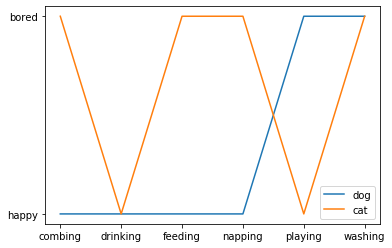

In [67]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activity = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()

In [ ]:
w